# Advanced Regression - Advanced
## **House flipping Assignment**
### Assignment Part-I

#### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1. Data Understanding

Lets understand the Data `train.csv`

In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
import statsmodels
import pylab as py
import scipy
import scipy.stats as stats

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV



# print library versions
print("\n")
from platform import python_version
print("python: ",python_version())
print("numpy: ",np.__version__) #numpy version
print("pandas: ",pd.__version__) #pandas version
print("matplotlib: ",matplotlib.__version__) #matplotlib version
print("seaborn: ",sns.__version__)
print("sklearn: ",sklearn.__version__)
print("statsmodels: ",statsmodels.__version__)
print("scipy: ",scipy.__version__)



python:  3.11.5
numpy:  1.24.3
pandas:  2.0.3
matplotlib:  3.7.2
seaborn:  0.12.2
sklearn:  1.3.0
statsmodels:  0.14.0
scipy:  1.11.1


In [2]:
# read data into a first data frame
house = pd.read_csv('train.csv')
# display first five rows
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#display basic statistical information for the data
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# check how many entries there are in the dataset 
house.shape

(1460, 81)

Here are basic statistical insights.  The standard deviation of quality variables is low, suggesting that the data is clustered around the mean. Other variables appear to have more spread out data. This is also the case for the dependant variable, the sales price. The data may not be normally distributed. This will be determined and addressed in the following section.

The data set consists of 1460 rows and 81 columns. It contains categorical and continuous variables that describe different types of data the company collects for its business. Not all of the columns will be useful for the analysis. EDA will be used to discover which data will be useful to build the regression model.

## 2. Data Cleaning
### 2.1 Missing values
The data set was analysed for missing values. There are various columns that have missing values. 

In [6]:
# check if any missing values are present in the data
house.isnull().sum().sum()

7829

In [7]:
# display the column names that have missing values
house.columns[house.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
# check the amount of missing values in the columns
columns_nan =  house.columns[house.isnull().any()]

for c in columns_nan:
    print(c, house[c].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [9]:
#check the percentage of missing data to make decisions on working with the missing data
nullval = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval.head(10)

,Null values in %
Feature names,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55


#### Insight into missing values
There are six columns that have more than half of the data values missing. The decision is to drop these columns. 
PoolQC, Alley, Fence and Fireplace are all features that could be added to or removed from an existing property should it be desired.

#### According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
##### Hence, we will first impute the categorical variables with 'None'

In [10]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    house[i].fillna("none", inplace=True)

In [11]:
# Check nulls once again
nullval = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval.head(10)

,Null values in %
Feature names,
LotFrontage,17.74
GarageYrBlt,5.55
MasVnrArea,0.55
Electrical,0.07
KitchenAbvGr,0.00
GarageType,0.00
FireplaceQu,0.00
Fireplaces,0.00
Functional,0.00


#### drop duplicates

In [12]:
# Let's drop duplicate columns if any present in data set 
house = house.drop_duplicates()
house.shape

(1460, 81)

#### Drop less relevant columns

In [13]:
# Let's check number of unique entries in each column
house.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [14]:
# based on data distribution in each column seen earlier 
# We have found out that 'Street','Utilities','CentralAir' have very low variance 
# And Id column has all unique values
# So let's drop these columns as they won't be that usefull for analysis
house = house.drop(['Street','Utilities','CentralAir','Id'], axis=1)

#### Change data type

In [15]:
# cross check if data type for MSSubClass has been changed
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [16]:
# change data type for MSSubClass to object as it is categorical variable
house[['MSSubClass']] = house[['MSSubClass']].astype('object')
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

#### Check pairplot and heatmap

In [17]:
# let's take all numeric (float and int) variables in the dataset
# to check pairplot and heatmap
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
# paiwise scatter plot for all numeric columns
# sns.pairplot(house_numeric)
#plt.show()

In [19]:
# correlation matrix
cor = house_numeric.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


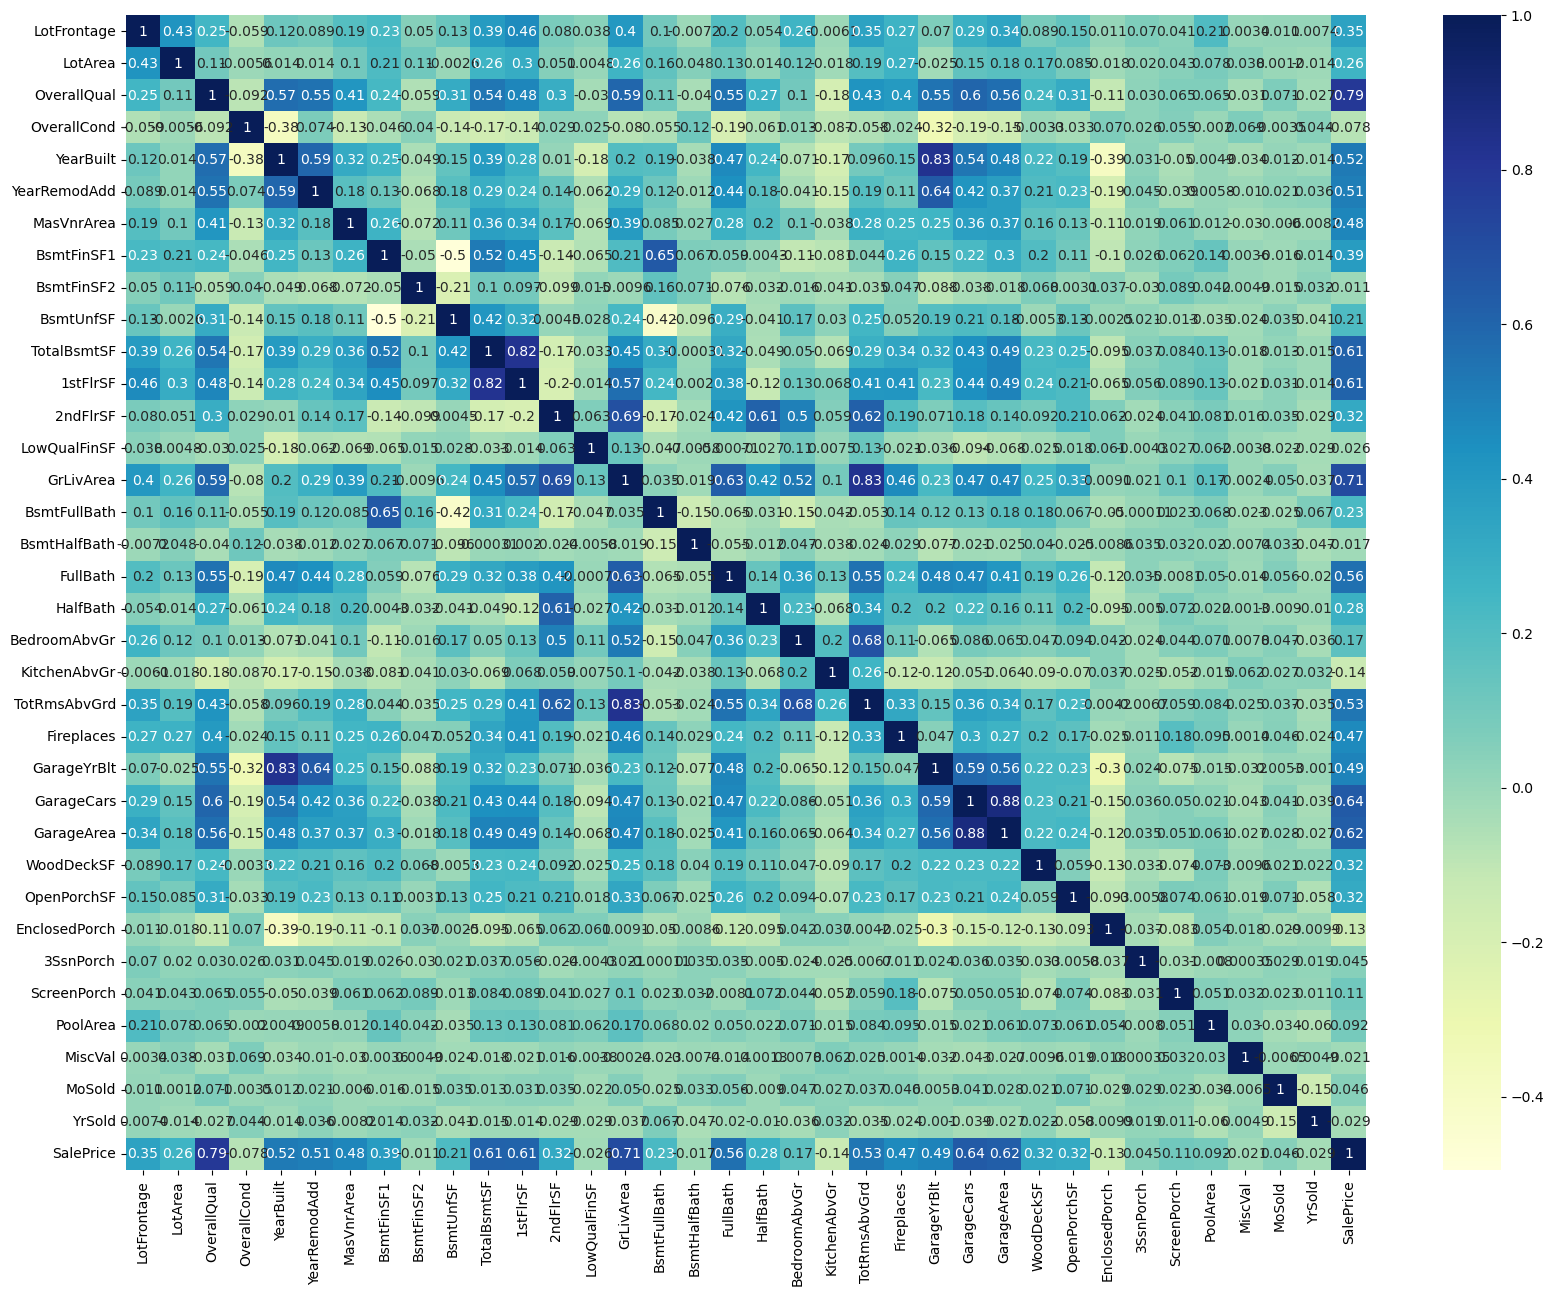

In [20]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize = (20, 15))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

In [21]:
house['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [22]:
house['YearRemodAdd'].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [23]:
house['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [24]:
house['YrSold'].describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

#### We see that max year is 2010 for all the columns, `YearBuilt`,`YearRemodAdd`,`GarageYrBlt`,`YrSold`
Lets analyse if there is need of this column

In [25]:
house['YearBuilt_Old'] = house.YearBuilt.max()-house.YearBuilt
house['YearRemodAdd_Old'] = house.YearRemodAdd.max()-house.YearRemodAdd
house['GarageYrBlt_Old'] = house.GarageYrBlt.max()-house.GarageYrBlt
house['YrSold_Old'] = house.YrSold.max()-house.YrSold
house[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
77,1948,2001,1948.0,2008,62,9,62.0,2
1432,1927,2007,1928.0,2007,83,3,82.0,3
924,1980,1980,1980.0,2006,30,30,30.0,4
1336,1973,1973,1973.0,2008,37,37,37.0,2
1015,2001,2001,2001.0,2009,9,9,9.0,1
1292,1892,1965,1985.0,2009,118,45,25.0,1
1412,1949,1950,1956.0,2009,61,60,54.0,1
1113,1953,2006,1953.0,2007,57,4,57.0,3
945,1890,1996,1963.0,2009,120,14,47.0,1
1215,1966,1966,1966.0,2007,44,44,44.0,3


#### Lets drop the actual Year columns

In [26]:
house = house.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [27]:
house[list(house.dtypes[house.dtypes!='object'].index)].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,31.493836,2.184247
std,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,24.689725,1.328095
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,8.000000,1.000000
50%,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,30.000000,2.000000
75%,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,49.000000,3.000000
max,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


In [28]:
house['PoolArea'].astype('category').value_counts()

PoolArea
0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: count, dtype: int64

In [29]:
house['ScreenPorch'].astype('category').value_counts()

ScreenPorch
0      1344
192       6
120       5
224       5
180       4
       ... 
175       1
178       1
40        1
185       1
480       1
Name: count, Length: 76, dtype: int64

In [30]:
house['3SsnPorch'].astype('category').value_counts()

3SsnPorch
0      1436
168       3
216       2
144       2
180       2
407       1
320       1
304       1
290       1
245       1
238       1
182       1
196       1
23        1
162       1
153       1
140       1
130       1
96        1
508       1
Name: count, dtype: int64

In [31]:
house['EnclosedPorch'].astype('category').value_counts()

EnclosedPorch
0      1252
112      15
96        6
120       5
192       5
       ... 
170       1
169       1
67        1
68        1
552       1
Name: count, Length: 120, dtype: int64

In [32]:
house['BsmtFinSF2'].astype('category').value_counts()

BsmtFinSF2
0       1293
180        5
374        3
117        2
391        2
        ... 
215        1
211        1
210        1
208        1
1474       1
Name: count, Length: 144, dtype: int64

In [33]:
house['MasVnrArea'].astype('category').value_counts()

MasVnrArea
0.0       861
180.0       8
108.0       8
72.0        8
16.0        7
         ... 
254.0       1
255.0       1
258.0       1
259.0       1
1600.0      1
Name: count, Length: 327, dtype: int64

In [34]:
house['GrLivArea'].astype('category').value_counts()

GrLivArea
864     22
1040    14
894     11
1456    10
848     10
        ..
1446     1
1453     1
1459     1
1468     1
5642     1
Name: count, Length: 861, dtype: int64

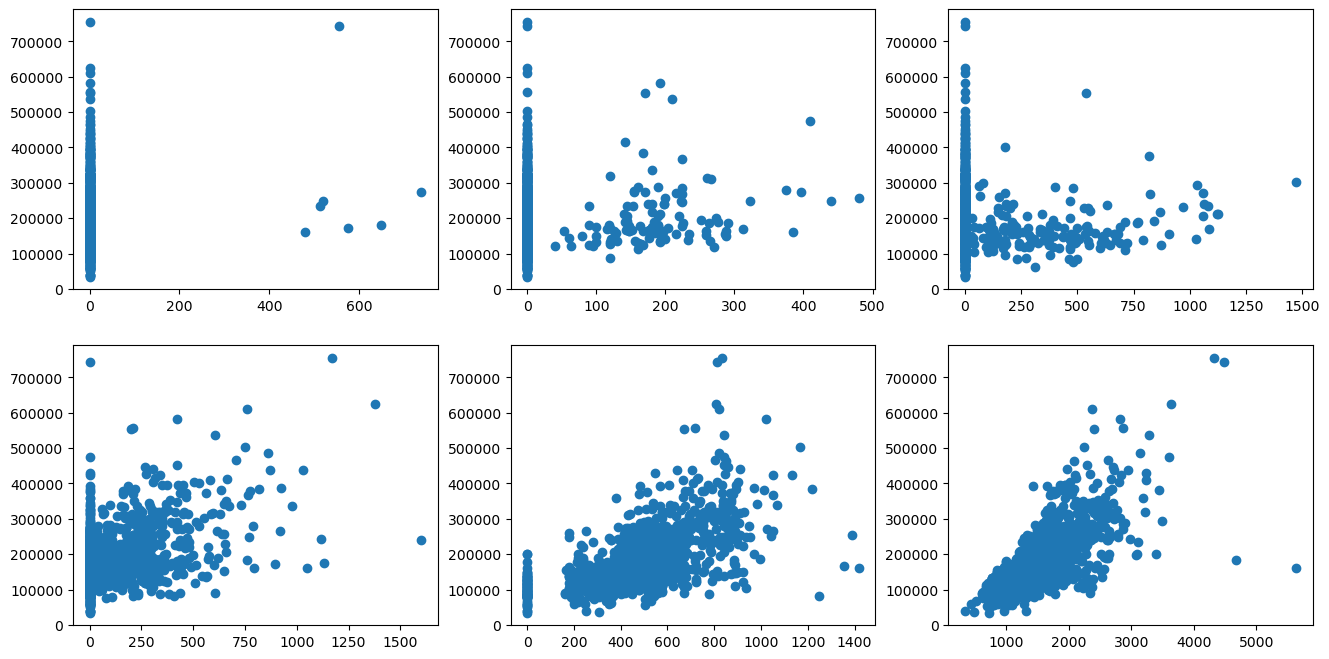

In [35]:

plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house['PoolArea'],house.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house['ScreenPorch'],house.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house['BsmtFinSF2'],house.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house['MasVnrArea'],house.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house['GarageArea'],house.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house['GrLivArea'],house.SalePrice)

We see that 90% of the data is 0 for columns `PoolArea`,`ScreenPorch`,`BsmtFinSF2`
Lets drop them

In [36]:
house = house.drop(['PoolArea','ScreenPorch','BsmtFinSF2'],axis='columns')

In [37]:
house.shape

(1460, 74)

#### Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

C:\Users\iphilip\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\iphilip\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


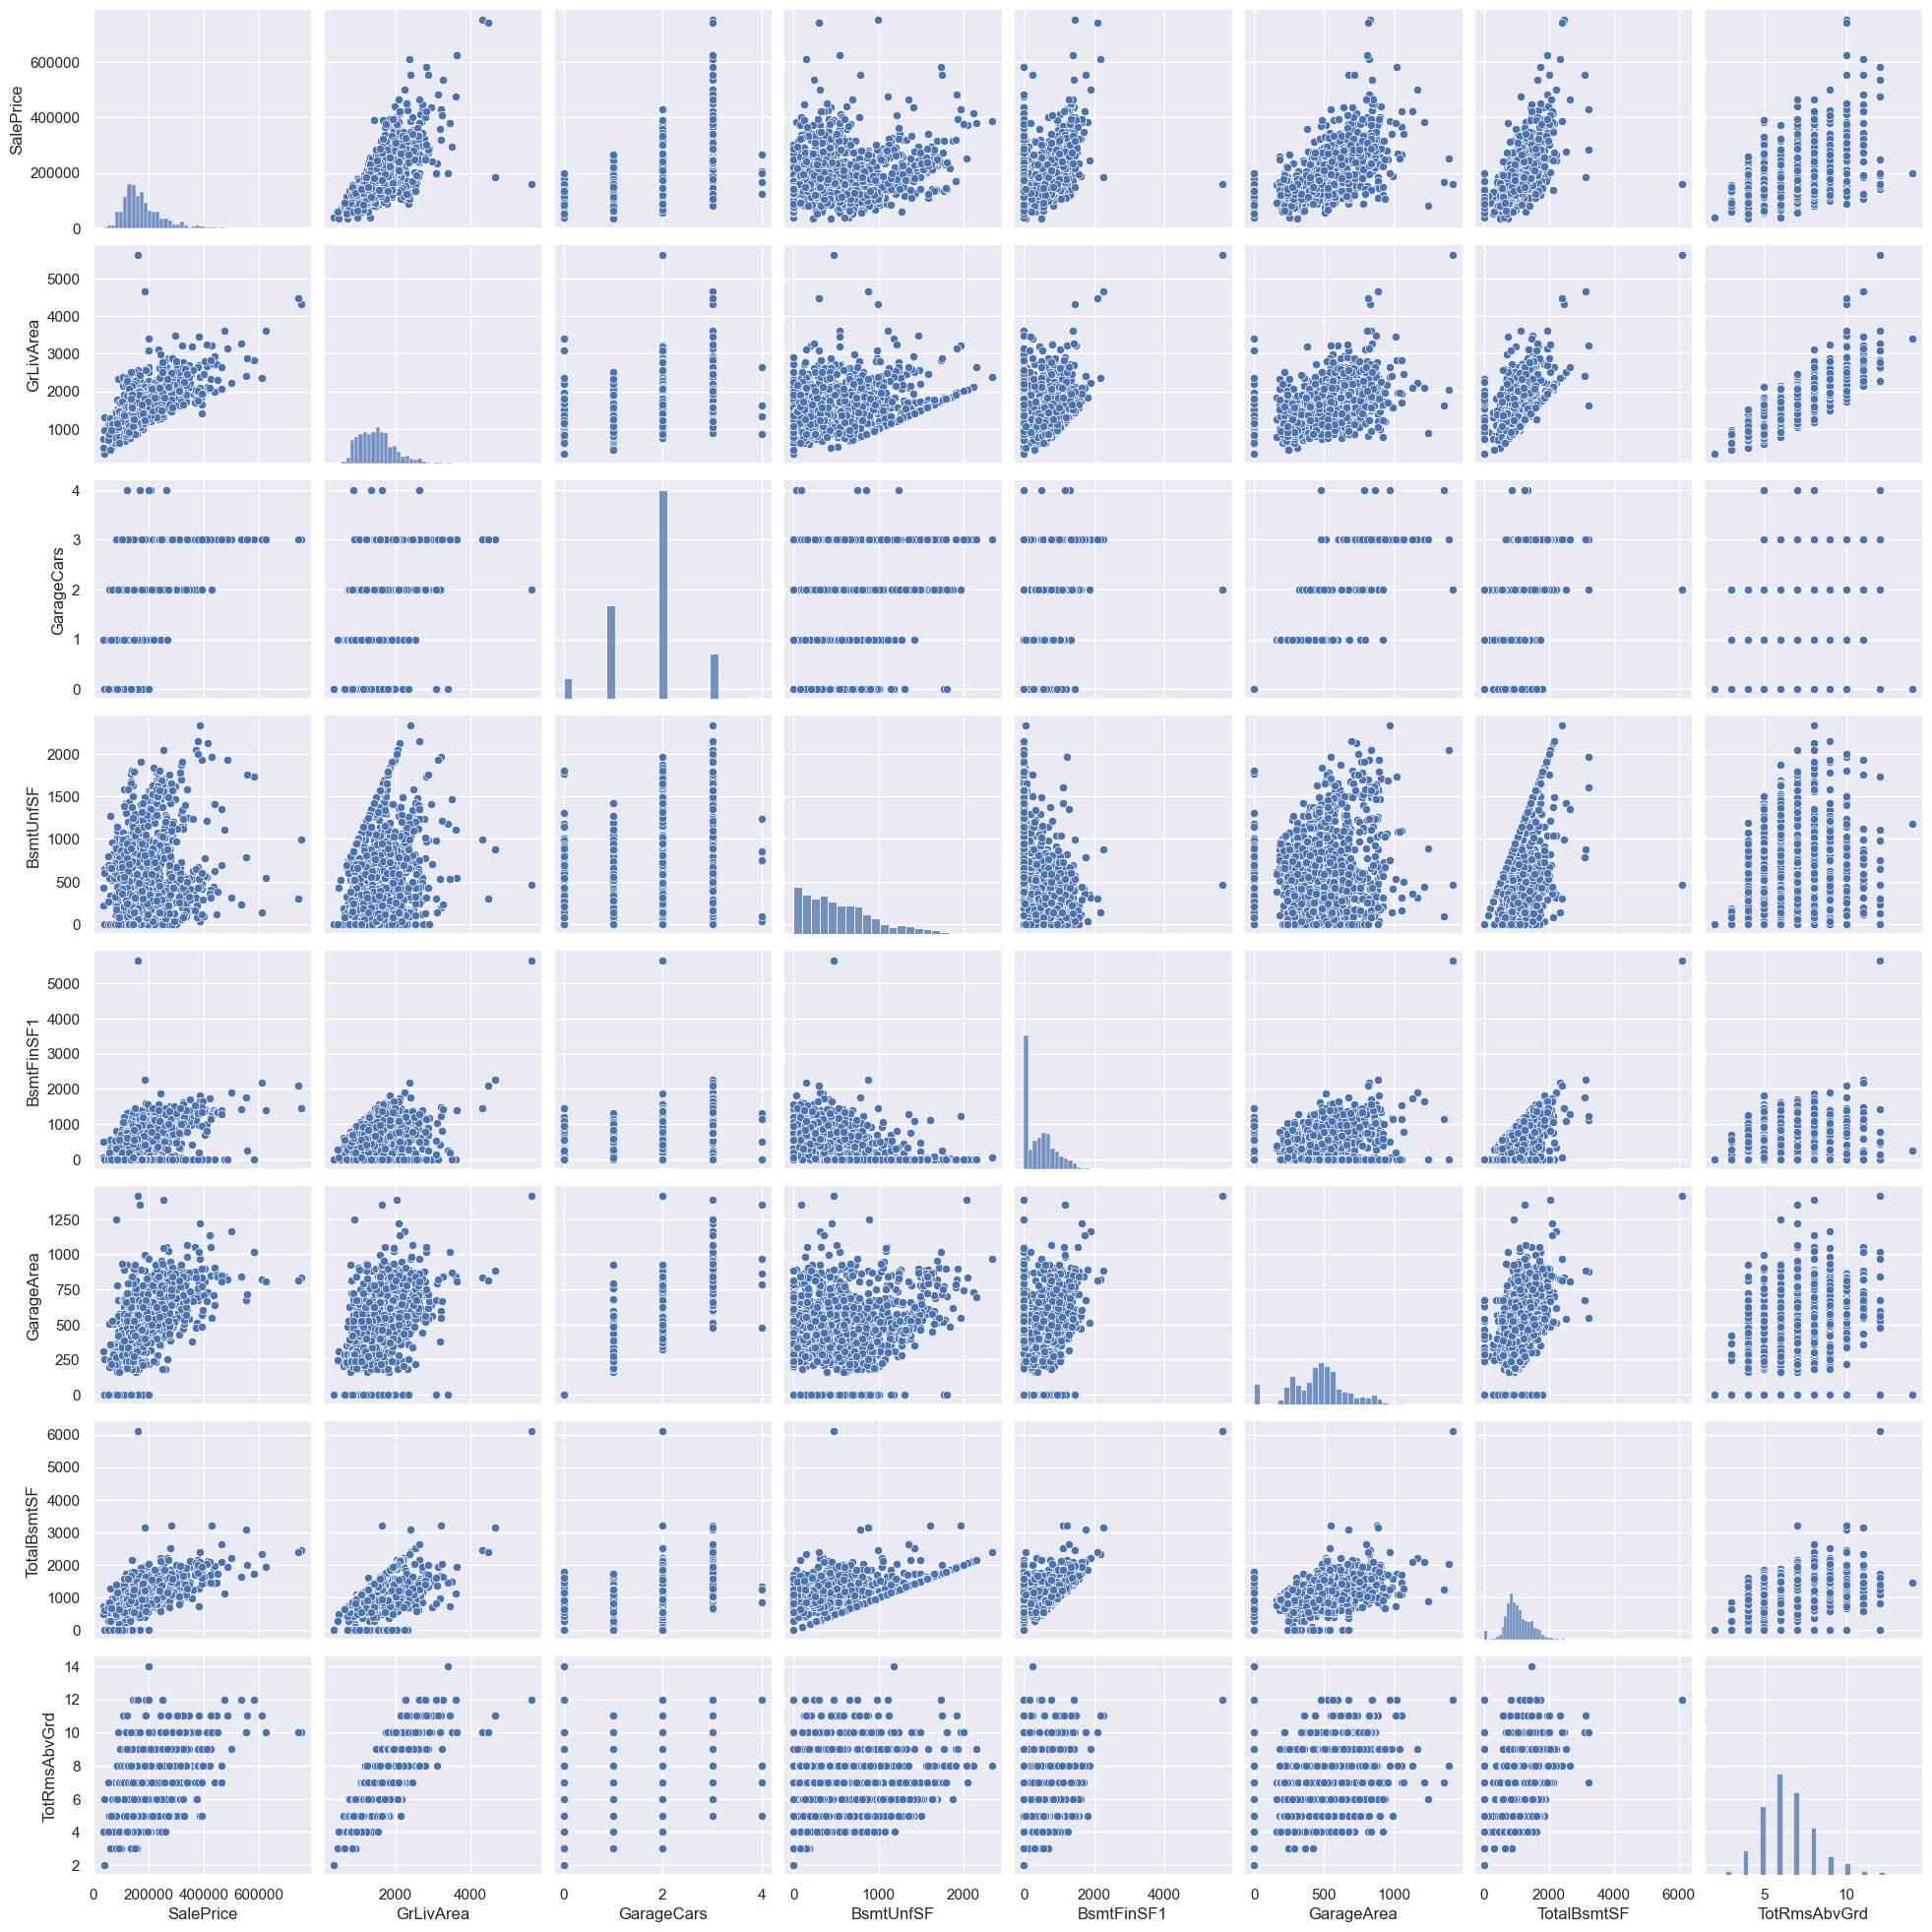

In [38]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd']
sns.pairplot(house[cols], size = 2.5)
plt.show()

In [39]:
num_col = list(house.dtypes[house.dtypes !='object'].index)
num_col = ['MasVnrArea','GarageArea','GrLivArea','SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house = drop_outliers(house)

In [40]:
house.shape

(1451, 74)

In [41]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1451 non-null   object 
 1   MSZoning          1451 non-null   object 
 2   LotFrontage       1194 non-null   float64
 3   LotArea           1451 non-null   int64  
 4   Alley             1451 non-null   object 
 5   LotShape          1451 non-null   object 
 6   LandContour       1451 non-null   object 
 7   LotConfig         1451 non-null   object 
 8   LandSlope         1451 non-null   object 
 9   Neighborhood      1451 non-null   object 
 10  Condition1        1451 non-null   object 
 11  Condition2        1451 non-null   object 
 12  BldgType          1451 non-null   object 
 13  HouseStyle        1451 non-null   object 
 14  OverallQual       1451 non-null   int64  
 15  OverallCond       1451 non-null   int64  
 16  RoofStyle         1451 non-null   object 
 17  

In [42]:
qualitative = [f for f in house.columns if house.dtypes[f] == 'object']

In [43]:
qualitative1=qualitative
qualitative1

['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

C:\Users\iphilip\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


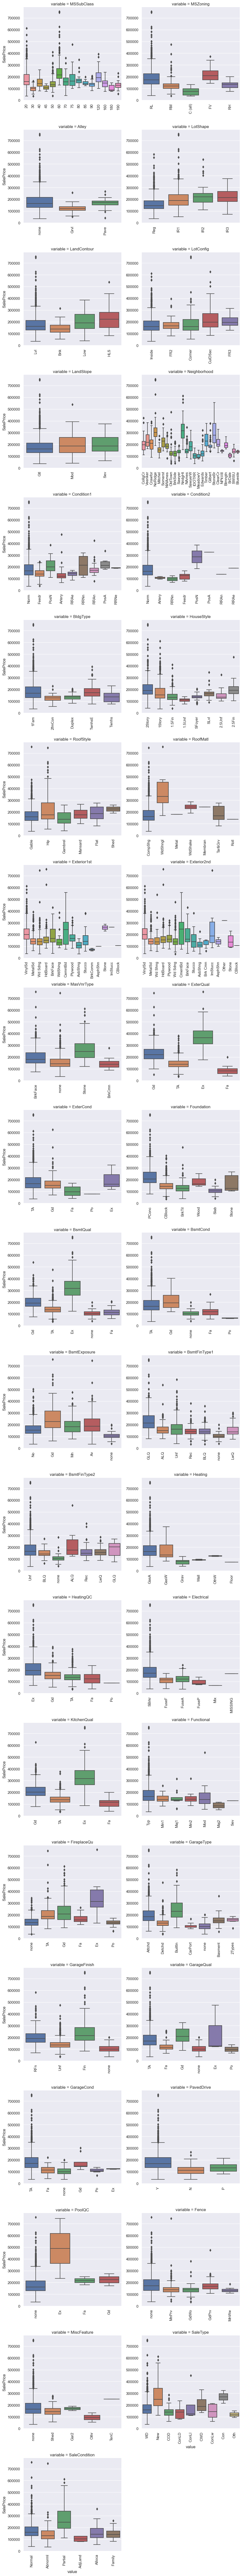

In [44]:
for c in qualitative:
    house[c] = house[c].astype('category')
    if house[c].isnull().any():
        house[c] = house[c].cat.add_categories(['MISSING'])
        house[c] = house[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(house, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

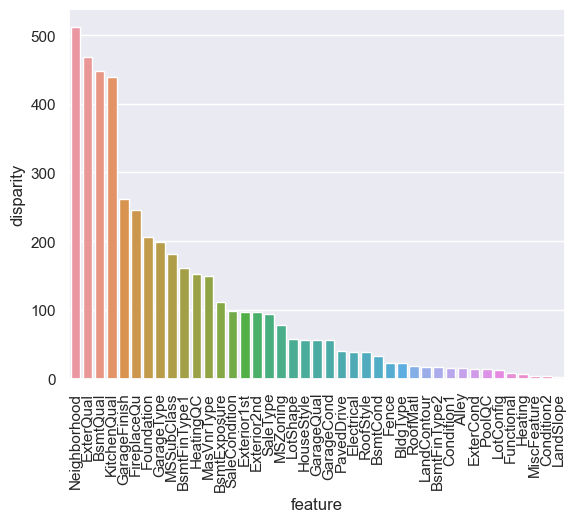

In [45]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(house)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [46]:
house.shape

(1451, 74)

In [47]:
house[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Gd,RFn,TA,TA,TA,IR1


In [48]:
house['LandSlope'] = house.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house['ExterQual'] = house.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['BsmtQual'] = house.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['BsmtCond'] = house.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['BsmtExposure'] = house.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house['BsmtFinType1'] = house.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['BsmtFinType2'] = house.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['HeatingQC'] = house.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['KitchenQual'] = house.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['GarageFinish'] = house.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house['GarageQual'] = house.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['GarageCond'] = house.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['ExterCond'] = house.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['LotShape'] = house.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [49]:
house[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4.0,3.0,1.0,6.0,1.0,4,3,2.0,3.0,3.0,2,3
1,0,2,4.0,3.0,4.0,5.0,1.0,4,2,2.0,3.0,3.0,2,3
2,0,3,4.0,3.0,2.0,6.0,1.0,4,3,2.0,3.0,3.0,2,0
3,0,2,3.0,4.0,1.0,5.0,1.0,3,3,1.0,3.0,3.0,2,0
4,0,3,4.0,3.0,3.0,6.0,1.0,4,3,2.0,3.0,3.0,2,0


### Creating Dummy columns to convert categorical into numerical

In [50]:
data = pd.get_dummies(house, drop_first=True )
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,4.0,3.0,1.0,6.0,706,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600,6,8,0.0,4.0,3.0,4.0,5.0,978,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250,7,5,162.0,4.0,3.0,2.0,6.0,486,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550,7,5,0.0,3.0,4.0,1.0,5.0,216,...,False,False,False,False,True,False,False,False,False,False
4,84.0,14260,8,5,350.0,4.0,3.0,3.0,6.0,655,...,False,False,False,False,True,False,False,False,True,False


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Columns: 238 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(197), float64(11), int64(30)
memory usage: 755.3 KB


In [52]:
data_bool = data.select_dtypes(include=['bool'])
data_bool.head()


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [53]:
data_bool.shape

(1451, 197)

In [54]:
#data=data.replace(True,1)
#data=data.replace(False,0)
#data

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Columns: 238 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(197), float64(11), int64(30)
memory usage: 755.3 KB


In [56]:
data.MasVnrArea.fillna(data.MasVnrArea.mean(),inplace=True)
data.BsmtQual.fillna('TA',inplace=True)
data.BsmtCond.fillna('TA',inplace=True)
data.BsmtExposure.fillna('No',inplace=True)
data.BsmtFinType1.fillna('Unf',inplace=True)
data.BsmtFinType2.fillna('Unf',inplace=True)
data.GarageFinish.fillna('Unf',inplace=True)
data.GarageQual.fillna('TA',inplace=True)
data.GarageCond.fillna('TA',inplace=True)

In [57]:

data['BsmtQual'] = data.BsmtQual.map({'NaN':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtCond'] = data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtExposure'] = data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data['BsmtFinType1'] = data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['BsmtFinType2'] = data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['GarageFinish'] = data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
data['GarageQual'] = data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['GarageCond'] = data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [58]:
data

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,NaN,NaN,NaN,NaN,706,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600,6,8,0.0,NaN,NaN,NaN,NaN,978,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250,7,5,162.0,NaN,NaN,NaN,NaN,486,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550,7,5,0.0,NaN,NaN,NaN,NaN,216,...,False,False,False,False,True,False,False,False,False,False
4,84.0,14260,8,5,350.0,NaN,NaN,NaN,NaN,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,0.0,NaN,NaN,NaN,NaN,0,...,False,False,False,False,True,False,False,False,True,False
1456,85.0,13175,6,6,119.0,NaN,NaN,NaN,NaN,790,...,False,False,False,False,True,False,False,False,True,False
1457,66.0,9042,7,9,0.0,NaN,NaN,NaN,NaN,275,...,False,False,False,False,True,False,False,False,True,False
1458,68.0,9717,5,6,0.0,NaN,NaN,NaN,NaN,49,...,False,False,False,False,True,False,False,False,True,False


In [59]:
data.BsmtQual.value_counts()

BsmtQual
3.0    37
Name: count, dtype: int64

In [60]:
data.BsmtQual.describe()

count    37.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
Name: BsmtQual, dtype: float64

In [61]:
data.BsmtCond.value_counts()

BsmtCond
3.0    37
Name: count, dtype: int64

In [62]:
data.BsmtCond.describe()

count    37.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
Name: BsmtCond, dtype: float64

In [63]:
data.BsmtExposure.value_counts()

BsmtExposure
1.0    38
Name: count, dtype: int64

In [64]:
data.BsmtExposure.describe()

count    38.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: BsmtExposure, dtype: float64

In [65]:
data.BsmtFinType1.value_counts()

BsmtFinType1
1.0    37
Name: count, dtype: int64

In [66]:
data.BsmtFinType1.describe()

count    37.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: BsmtFinType1, dtype: float64

In [67]:
data.BsmtFinType2.value_counts()

BsmtFinType2
1.0    38
Name: count, dtype: int64

In [68]:
data.BsmtFinType2.describe()

count    38.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: BsmtFinType2, dtype: float64

There are only one value for columns `BsmtQual`,`BsmtCond`,`BsmtExposure`,`BsmtFinType1`,`BsmtFinType2`. Lets drop them

In [69]:
data=data.drop(['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'],axis=1)

In [70]:
data

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,150,856,856,854,...,False,False,False,False,True,False,False,False,True,False
1,80.0,9600,6,8,0.0,978,284,1262,1262,0,...,False,False,False,False,True,False,False,False,True,False
2,68.0,11250,7,5,162.0,486,434,920,920,866,...,False,False,False,False,True,False,False,False,True,False
3,60.0,9550,7,5,0.0,216,540,756,961,756,...,False,False,False,False,True,False,False,False,False,False
4,84.0,14260,8,5,350.0,655,490,1145,1145,1053,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,0.0,0,953,953,953,694,...,False,False,False,False,True,False,False,False,True,False
1456,85.0,13175,6,6,119.0,790,589,1542,2073,0,...,False,False,False,False,True,False,False,False,True,False
1457,66.0,9042,7,9,0.0,275,877,1152,1188,1152,...,False,False,False,False,True,False,False,False,True,False
1458,68.0,9717,5,6,0.0,49,0,1078,1078,0,...,False,False,False,False,True,False,False,False,True,False


In [71]:
data = data.fillna(0)

## 4.2 Scaling Data

#### Let us check the distribution of our target variable before scaling and Splitting

C:\Users\iphilip\AppData\Local\Temp\5\ipykernel_33012\3988467431.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.SalePrice)


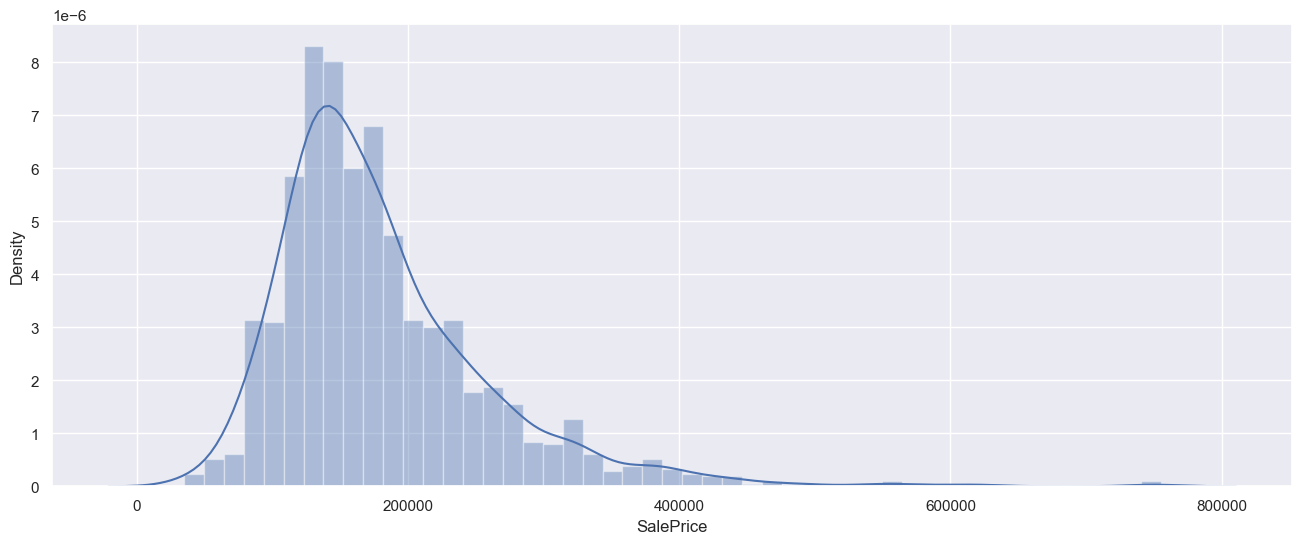

In [72]:
plt.figure(figsize=(16,6))
sns.distplot(data.SalePrice)
plt.show()

#### Creating train and test dataset for validation purpose

#### Scaling the train dataset

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_var = data.columns
data[scale_var] = scaler.fit_transform(data[scale_var])

In [74]:
data.shape

(1451, 233)

In [75]:
data.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,0.183575,0.042864,0.565587,0.572450,0.064505,0.193976,0.242783,0.328248,0.285016,0.167810,...,0.003446,0.003446,0.081323,0.002068,0.869745,0.002757,0.007581,0.013784,0.822881,0.083391
std,0.108635,0.046246,0.153105,0.139177,0.112633,0.192272,0.189310,0.130279,0.129169,0.211251,...,0.058621,0.058621,0.273425,0.045439,0.336700,0.052450,0.086768,0.116632,0.381901,0.276567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134185,0.029155,0.444444,0.500000,0.000000,0.000000,0.095034,0.247817,0.189357,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.201278,0.038220,0.555556,0.500000,0.000000,0.168584,0.205051,0.308796,0.259848,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.252396,0.048143,0.666667,0.625000,0.103438,0.312389,0.345890,0.404398,0.365066,0.352542,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
df_train,df_test = train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

#### Lets check the distribution again after scaling

C:\Users\iphilip\AppData\Local\Temp\5\ipykernel_33012\381405202.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.SalePrice)
C:\Users\iphilip\AppData\Local\Temp\5\ipykernel_33012\381405202.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test.SalePrice)


<Axes: xlabel='SalePrice', ylabel='Density'>

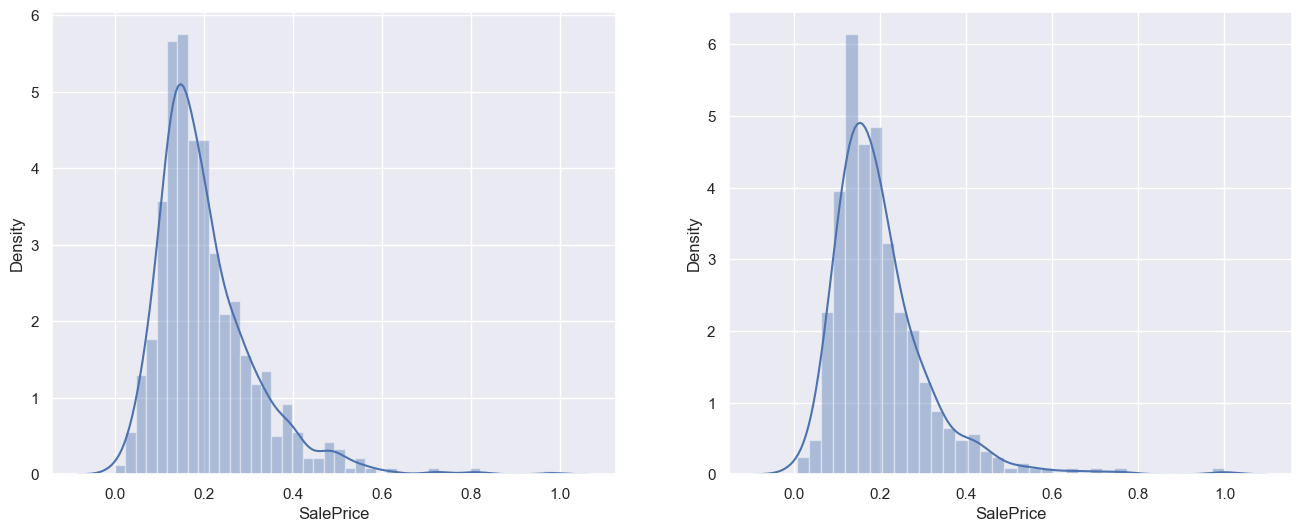

In [77]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Spliting the dependent and independent variable

In [78]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [79]:
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Now using  RFE  lets try to to find the optimal number of feature

In [80]:
len(X_train.columns)

232

In [81]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [82]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 10),
 ('BsmtHalfBath', False, 19),
 ('FullBath', False, 108),
 ('HalfBath', False, 88),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 50),
 ('Fireplaces', True, 1),
 ('GarageFinish', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 67),
 ('GarageQual', True, 1),
 ('GarageCond', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 85),
 ('3SsnPorch', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 40),
 ('YearBuilt_Old', True, 1),
 ('YearRemodAdd_Old', False, 34),
 ('GarageYrBlt_Old', True, 1),
 ('YrSold_Old', False, 107),
 ('MSSubClass_30', False, 102),
 ('MSSubClass_40', Fa

In [83]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=116)

In [84]:
X_train.columns[~rfe.support_]

Index(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'GarageArea', 'EnclosedPorch', 'MoSold', 'YearRemodAdd_Old',
       'YrSold_Old',
       ...
       'GarageType_Detchd', 'PavedDrive_P', 'PavedDrive_Y', 'Fence_GdWo',
       'Fence_MnPrv', 'Fence_MnWw', 'Fence_none', 'SaleType_ConLw',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=116)

In [85]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9410565347048351

In [86]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss=np.sum(np.square(y_train,y_train_pred))
print(rss)
mse=mean_squared_error(y_train,y_train_pred)
print(mse)
#Root Mean Squared Error
rmse=mse**0.5
print(rmse)

54.32737425075646
0.025095257254147716
0.15841482649723074


In [87]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-9.547027127846583e+19

In [88]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('LotFrontage', 14290832627.477),
 ('LotArea', 0.011),
 ('OverallQual', 0.212),
 ('OverallCond', 0.119),
 ('MasVnrArea', 0.056),
 ('BsmtFinSF1', 0.053),
 ('BsmtUnfSF', 0.05),
 ('TotalBsmtSF', -0.021),
 ('1stFlrSF', 0.114),
 ('2ndFlrSF', -31275107065.693),
 ('LowQualFinSF', -22316204592.428),
 ('GrLivArea', -6181534637.763),
 ('BsmtFullBath', 46923467477.648),
 ('BsmtHalfBath', 0.01),
 ('FullBath', -0.015),
 ('HalfBath', -0.002),
 ('BedroomAbvGr', -0.002),
 ('KitchenAbvGr', -0.077),
 ('TotRmsAbvGrd', -0.066),
 ('Fireplaces', 0.009),
 ('GarageFinish', 0.027),
 ('GarageCars', -94911219424.906),
 ('GarageArea', 0.051),
 ('GarageQual', -0.005),
 ('GarageCond', 262805158541.585),
 ('WoodDeckSF', -21329581882.19),
 ('OpenPorchSF', 0.013),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', -0.003),
 ('MiscVal', 0.025),
 ('MoSold', 0.318),
 ('YearBuilt_Old', -0.005),
 ('YearRemodAdd_Old', -0.052),
 ('GarageYrBlt_Old', -0.006),
 ('YrSold_Old', -0.019),
 ('MSSubClass_30', 0.001),
 ('MSSubClass_40', -0.00

In [89]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.00001,0.0001,0.001, 0.01, 0.1,1.0, 5.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 5.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [90]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.278931,0.083026,0.015688,0.001233,0.00001,{'alpha': 1e-05},0.837355,0.865066,0.905772,0.886100,...,0.941221,0.942464,0.940349,0.942712,0.941999,0.947401,0.938842,0.944698,0.942542,0.002299
1,0.250803,0.049794,0.016508,0.001888,0.00010,{'alpha': 0.0001},0.884988,0.853493,0.915484,0.896419,...,0.926156,0.925642,0.926472,0.929352,0.926915,0.931123,0.924184,0.929540,0.927550,0.001998
2,0.047851,0.008533,0.016202,0.002961,0.00100,{'alpha': 0.001},0.876640,0.797537,0.890242,0.828834,...,0.846449,0.841471,0.868366,0.851735,0.846167,0.852860,0.845698,0.849810,0.850087,0.006844
3,0.041049,0.004856,0.018587,0.002374,0.01000,{'alpha': 0.01},0.482207,0.350517,0.535967,0.333262,...,0.430392,0.436791,0.440865,0.440396,0.433580,0.459735,0.455107,0.456453,0.446927,0.011446
4,0.034962,0.002889,0.016680,0.002822,0.10000,{'alpha': 0.1},-0.005261,-0.000804,-0.000321,-0.118959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


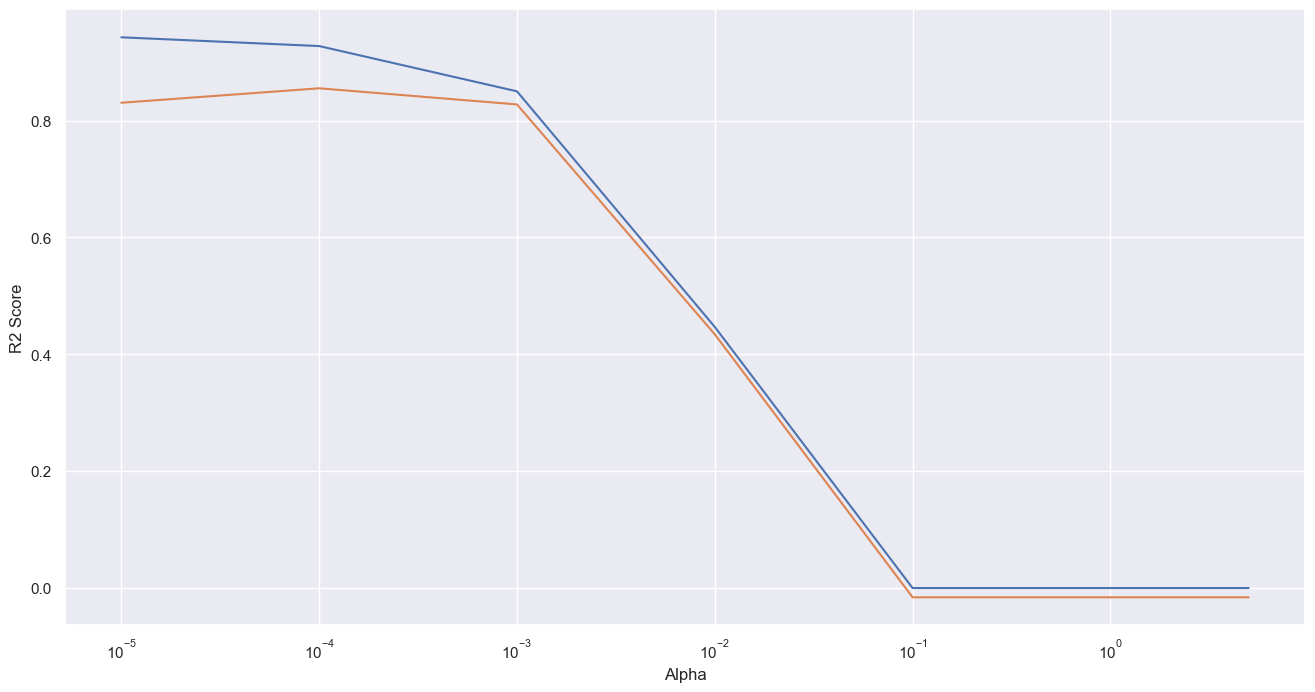

In [91]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [92]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [93]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8491476548762178
0.8205905967877659


In [94]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [95]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
12,BsmtFullBath,0.234216
3,OverallCond,0.158898
6,BsmtUnfSF,0.078144
22,GarageArea,0.052391
8,1stFlrSF,0.038789
82,Neighborhood_NridgHt,0.025545
83,Neighborhood_OldTown,0.024784
9,2ndFlrSF,0.024093
225,SaleType_Oth,0.022098
20,GarageFinish,0.015956


## Now lets use the ridge regression

In [96]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.00001,0.0001,0.001, 0.01, 0.1,1.0, 5.0]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 5.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [97]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9410553082391946
0.780128576013489


#### As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

In [98]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.037345,0.007515,0.015402,0.001584,0.00001,{'alpha': 1e-05},0.798288,0.827124,0.887720,0.873286,...,0.942240,0.943639,0.941224,0.943645,0.943022,0.948620,0.939873,0.945625,0.943579,0.002331
1,0.033127,0.002531,0.015617,0.001787,0.00010,{'alpha': 0.0001},0.798312,0.827176,0.887756,0.873300,...,0.942240,0.943639,0.941224,0.943645,0.943022,0.948620,0.939873,0.945625,0.943579,0.002331
2,0.034145,0.003028,0.015491,0.002007,0.00100,{'alpha': 0.001},0.798557,0.827687,0.888093,0.873435,...,0.942239,0.943638,0.941223,0.943644,0.943022,0.948619,0.939871,0.945625,0.943578,0.002331
3,0.033610,0.003308,0.015100,0.001433,0.01000,{'alpha': 0.01},0.801253,0.832184,0.890409,0.874659,...,0.942195,0.943601,0.941188,0.943600,0.942993,0.948563,0.939825,0.945599,0.943540,0.002330
4,0.034033,0.003611,0.014416,0.001373,0.10000,{'alpha': 0.1},0.822078,0.853066,0.898817,0.882684,...,0.941388,0.942739,0.940855,0.942894,0.942164,0.947547,0.939009,0.944835,0.942757,0.002246


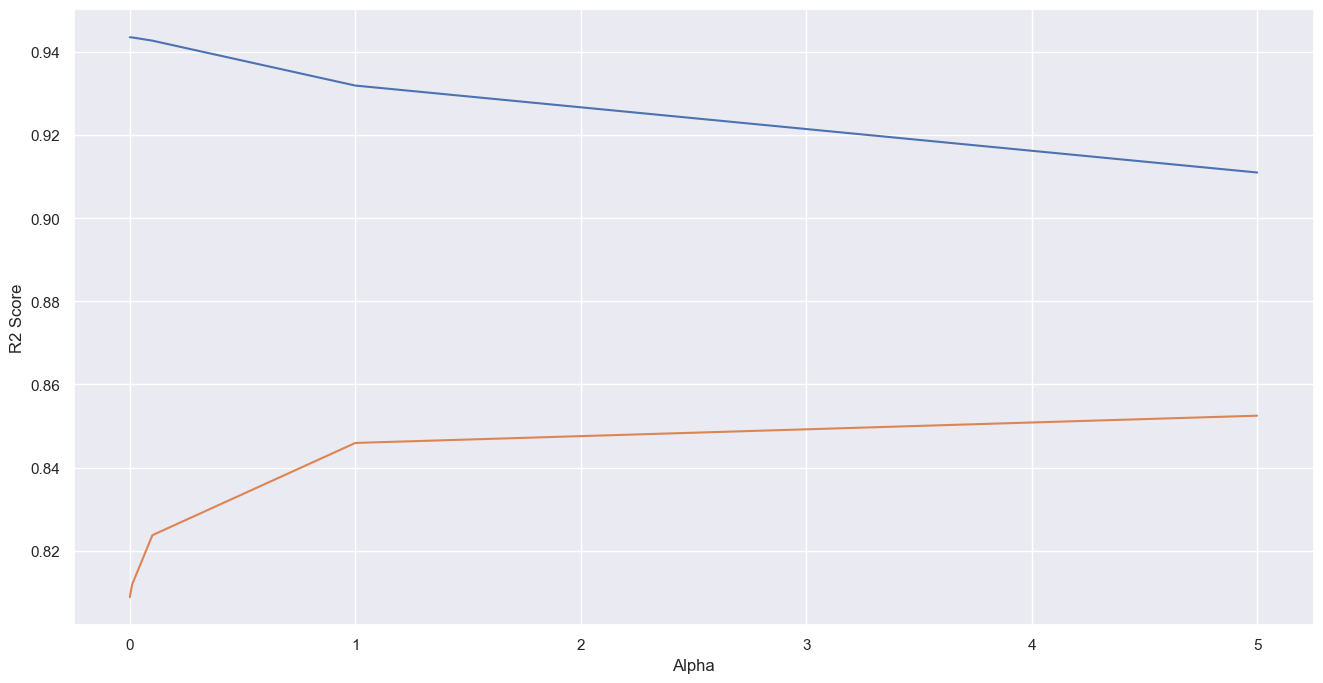

In [99]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [100]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 5.0}

In [101]:
ridge = Ridge(alpha = 5)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9101202551420328
0.8798104854055782


In [102]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [103]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
3,OverallCond,0.091025
12,BsmtFullBath,0.081013
9,2ndFlrSF,0.076186
6,BsmtUnfSF,0.064834
10,LowQualFinSF,0.063976
8,1stFlrSF,0.061067
82,Neighborhood_NridgHt,0.043873
20,GarageFinish,0.040457
19,Fireplaces,0.039825
22,GarageArea,0.039635


In [104]:
 lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9253921472169352
0.858440420123422


In [105]:
ridge = Ridge(alpha=5.0)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9101202551420328
0.8798104854055782


### Observation:
#### the model performance by Ridge and Lasso Regressionare close in terms of R2 values of Train and Test, 
#### it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
#### the predictive variables.
#### It is always advisable to use simple yet robust model.

## Final Model

In [106]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9253921472169352
0.858440420123422


#### After compairing both the model we can see that the below Features are best explaining the DataSet

In [107]:
# BsmtFullBath : Basement full bathrooms
# OverallCond  : Rates the overall condition of the house
# BsmtUnfSF	   : Unfinished square feet of basement area
# GarageArea   : Size of garage in square feet
# 1stFlrSF     : First Floor square feet

#### Best alpha value for Lasso : {'alpha': 0.0001}
#### Best alpha value for Ridge : {'alpha': 5}

# Assignment 2
#### Question 1
#### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [108]:
double_alpha=0.0001 *2
lasso = Lasso(alpha=double_alpha)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9116670610263857
0.8635040740503076


In [109]:
double_alpha=5.0 *2
ridge = Ridge(alpha=double_alpha)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.897053419987246
0.8699693054805355


In [110]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [111]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
12,BsmtFullBath,0.288767
3,OverallCond,0.138575
6,BsmtUnfSF,0.073790
8,1stFlrSF,0.056768
22,GarageArea,0.044258
4,MasVnrArea,0.042642
82,Neighborhood_NridgHt,0.041768
2,OverallQual,0.037886
5,BsmtFinSF1,0.036054
9,2ndFlrSF,0.035631


#### Question 3
#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [112]:
data.shape

(1451, 233)

In [113]:
data=data.drop(['BsmtFullBath','OverallCond','BsmtUnfSF','1stFlrSF','GarageArea'],axis=1)

In [114]:
df_train,df_test = train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [115]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [116]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.00001,0.0001,0.001, 0.01, 0.1,1.0, 5.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 5.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [117]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [118]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8486945460009021
0.8197883201643478


In [119]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
9,BsmtHalfBath,0.245056
3,MasVnrArea,0.157605
5,TotalBsmtSF,0.078639
18,GarageQual,0.058272
6,2ndFlrSF,0.051198
77,Neighborhood_NridgHt,0.025445
78,Neighborhood_OldTown,0.024862
220,SaleType_Oth,0.022213
16,GarageFinish,0.015913
47,MSZoning_RM,0.010065
